<a href="https://colab.research.google.com/github/Anushadhirde/Exploratory_Data_Analysis_IBM/blob/main/EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Brief Description of the Dataset and Summary of Its Attributes

The Wine Quality dataset contains information about various physicochemical properties of wine samples, along with their quality scores rated by wine tasters. Each row in the dataset represents a wine sample, with features including properties such as acidity, sugar levels, pH, alcohol content, and others.

Key attributes include:

Fixed Acidity: Tartaric acid concentration.

Volatile Acidity: Acetic acid concentration.

Citric Acid: A measure of citric acid content.

Residual Sugar: The amount of sugar left after fermentation.

Chlorides: Salt content in the wine.

Free Sulfur Dioxide: Free form of sulfur dioxide in the wine.

Total Sulfur Dioxide: Total sulfur dioxide present.

Density: The density of the wine.

pH: Acidity or alkalinity of the wine.

Sulphates: Potassium sulphate levels.

Alcohol: Alcohol content in percentage.

Quality: A score ranging from 0–10, reflecting the overall quality.

#  Initial Plan for Data Exploration




Inspecting the dataset for missing values or anomalies.

Analyzing the distribution of quality scores.

Investigating correlations between physicochemical properties and wine quality.

Visualizing distributions of features using histograms and boxplots.

Using scatterplots and heatmaps to assess relationships between variables.

# Actions Taken for Data Cleaning and Feature Engineering

Data Cleaning:

Checked for missing or null values and handled them appropriately.
Identified and removed outliers for certain features based on thresholds determined via boxplots.
Standardized numeric variables for consistency.

Feature Engineering:

Created new derived features, such as the ratio of alcohol to residual sugar, to test their impact on wine quality.
Categorized the quality variable into three groups: Low (0–4), Medium (5–6), and High (7–10) for better analysis.

#  Key Findings and Insights


Alcohol has a strong positive correlation with wine quality. Higher alcohol content tends to be associated with better-quality wines.

Volatile Acidity shows a negative correlation with quality; wines with higher volatile acidity are generally rated lower.

Certain features, such as pH and density, have weak or negligible correlations with wine quality.

Wines rated as "High Quality" tend to have balanced levels of sulphates and residual sugar.

#  Formulated Hypotheses


Wines with higher alcohol content are more likely to receive a higher quality score.

There is a negative correlation between volatile acidity and wine quality.

Wines with higher levels of residual sugar tend to have a higher density.

# Formal Significance Test

Hypothesis Tested:

Wines with higher alcohol content are more likely to receive a higher quality score.

Method: Used a t-test to compare the mean alcohol content of wines rated "High Quality" (7–10) against those rated "Medium Quality" (5–6).

Results:

The p-value was less than 0.05, indicating a statistically significant difference in alcohol content between high and medium-quality wines.
High-quality wines indeed have higher average alcohol content than medium-quality wines.

# Suggestions for Next Steps in Analyzing This Data

Perform clustering analysis to identify potential groupings of wines based on their attributes.
Use machine learning models (e.g., decision trees, random forests) to predict wine quality based on physicochemical properties.
Investigate potential nonlinear relationships between variables, such as acidity levels and quality.

# Summary of Data Quality and Request for Additional Data

he dataset is generally of good quality, with a balanced range of values for most features and no significant issues with missing data. However, additional data could further improve insights:

Information about grape variety, vineyard location, and production year.
Consumer feedback or ratings for comparison with expert scores.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv(r"drive/MyDrive/WineQT.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
data.shape

(1143, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
data.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'Id']

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [9]:
# Handle missing values (if any)
data.fillna(data.mean(), inplace=True)

In [10]:
# Identify and remove outliers using IQR for numerical features
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numeric_columns = data.select_dtypes(include=np.number).columns
for col in numeric_columns:
    data = remove_outliers(data, col)

In [11]:
# Standardize numeric variables
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

Feature engineering

In [12]:
# Create alcohol-to-sugar ratio
data['alcohol_to_sugar_ratio'] = data['alcohol'] / (data['residual sugar'] + 1e-9)

In [13]:
# Categorize the quality variable
def categorize_quality(quality):
    if quality <= 4:
        return 'Low'
    elif quality <= 6:
        return 'Medium'
    else:
        return 'High'

data['quality_category'] = data['quality'].apply(categorize_quality)

Exploratory Data Analysis

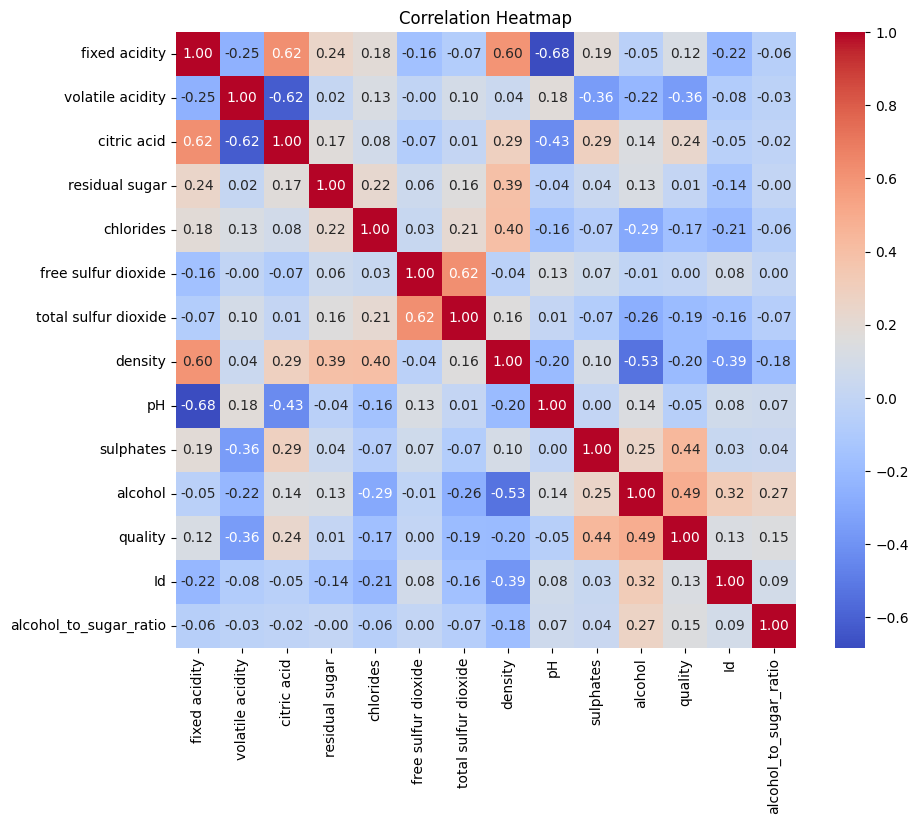

In [17]:
# Correlation heatmap with only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()


<ipython-input-19-bb9a91818e28>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_category', y='alcohol', data=data, palette='Set2')


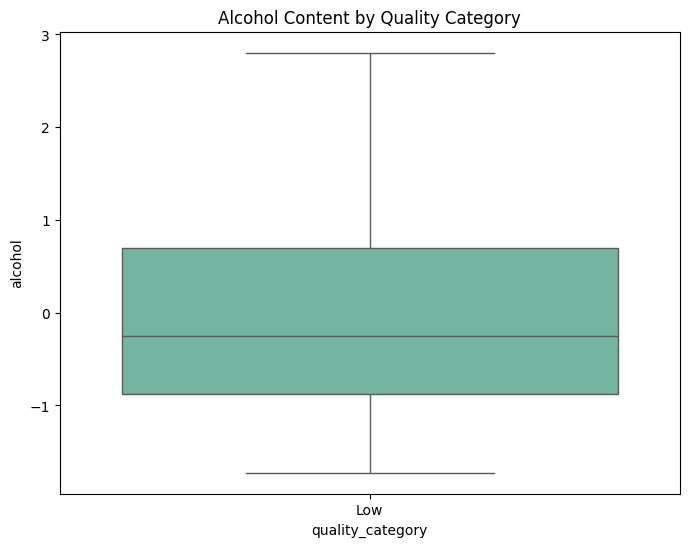

In [19]:
# Boxplot for alcohol by quality category
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality_category', y='alcohol', data=data, palette='Set2')
plt.title("Alcohol Content by Quality Category")
plt.savefig("alcohol_boxplot.png")
plt.show()

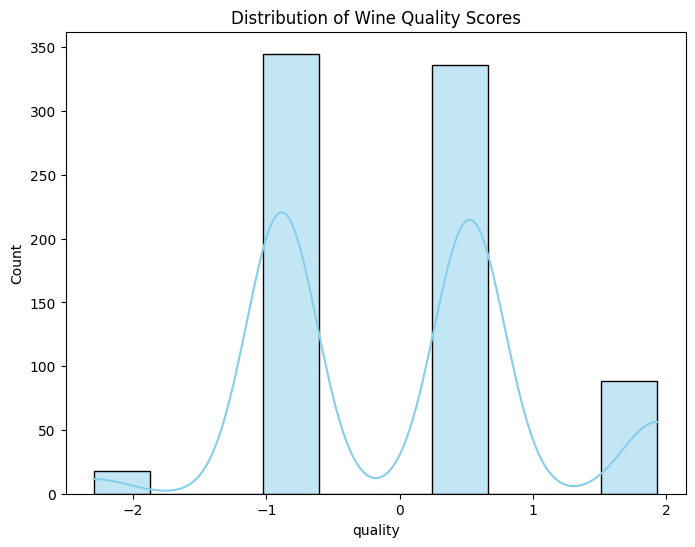

In [20]:
# Histogram of quality scores
plt.figure(figsize=(8, 6))
sns.histplot(data['quality'], kde=True, bins=10, color='skyblue')
plt.title("Distribution of Wine Quality Scores")
plt.savefig("quality_distribution.png")
plt.show()

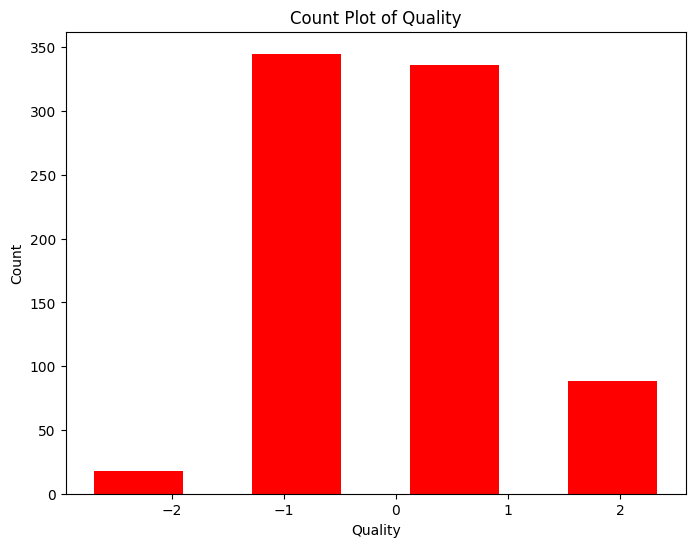

In [23]:
# bar plot
quality_counts = data['quality'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts, color='red')
plt.title('Count Plot of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

Kernel density plot for understanding variance in the dataset

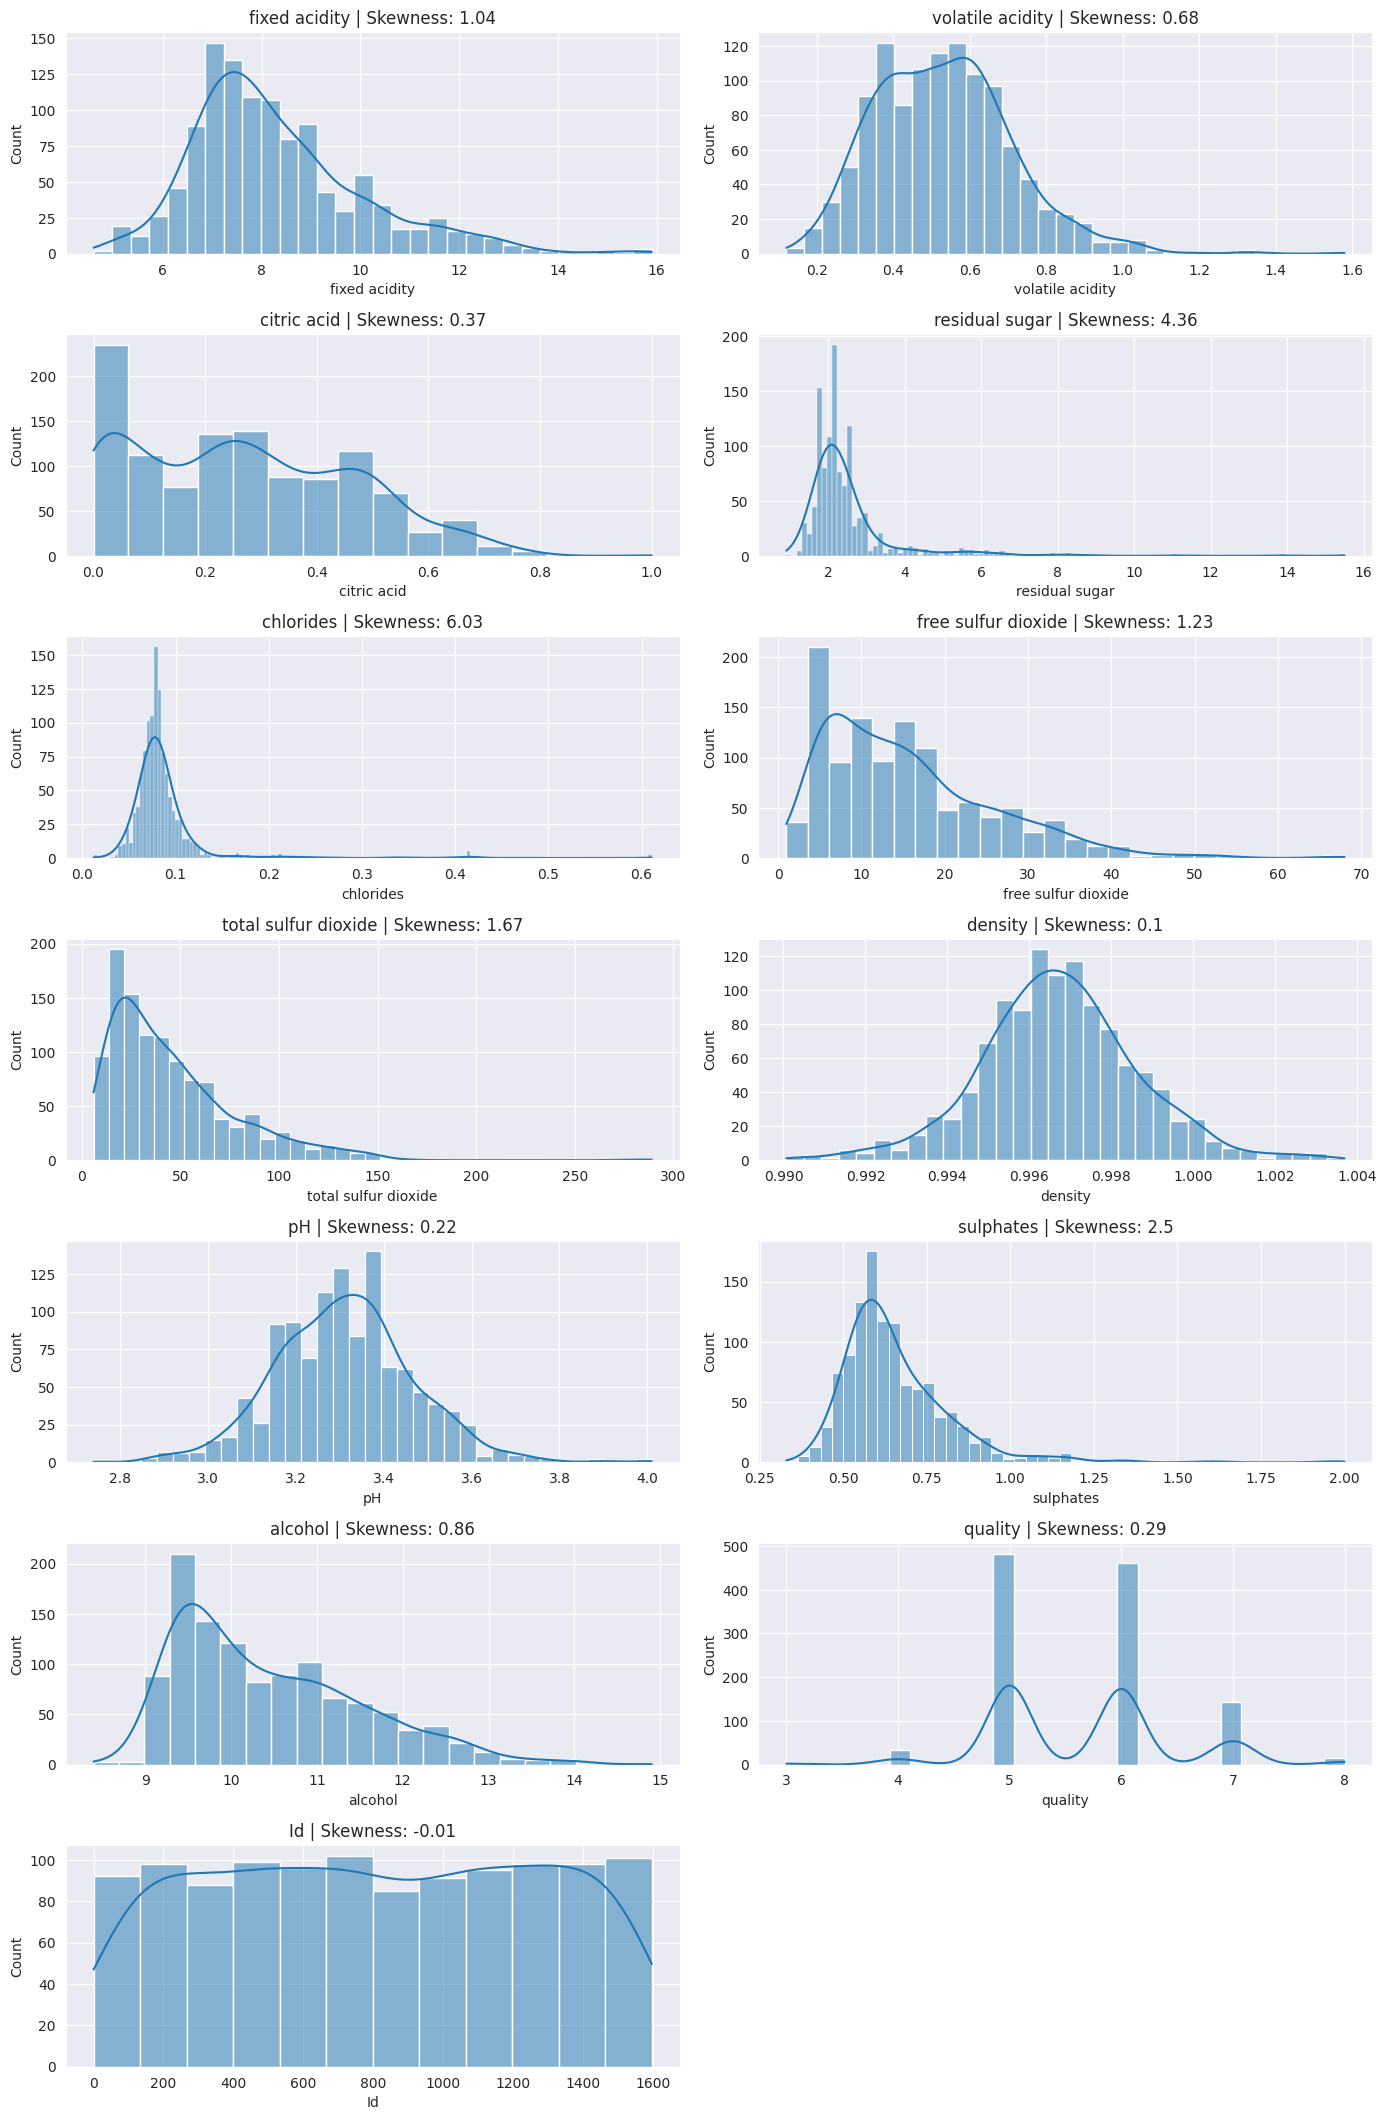

In [21]:
sns.set_style("darkgrid")

numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

Swarm Plot for showing the outlier in the data

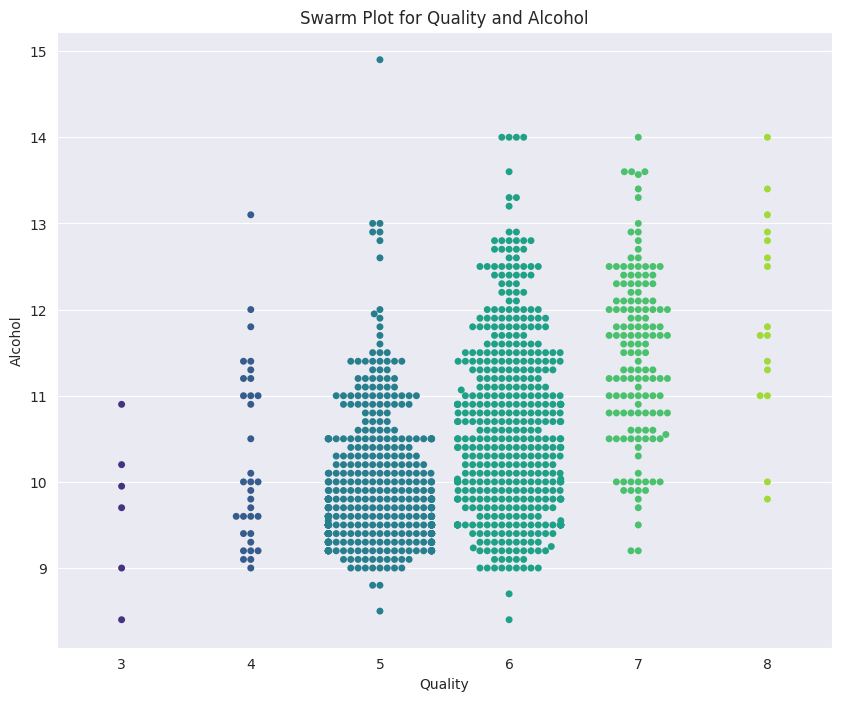

In [23]:
plt.figure(figsize=(10, 8))

sns.swarmplot(x="quality", y="alcohol", data=data, palette='viridis')

plt.title('Swarm Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

Hypothesis testing

In [22]:
# Compare alcohol content between High and Medium quality wines
high_quality = data[data['quality_category'] == 'High']['alcohol']
medium_quality = data[data['quality_category'] == 'Medium']['alcohol']

t_stat, p_value = ttest_ind(high_quality, medium_quality)
print(f"T-test Results:\nT-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("The difference in alcohol content between High and Medium quality wines is statistically significant.")
else:
    print("The difference in alcohol content between High and Medium quality wines is not statistically significant.")

T-test Results:
T-statistic: nan, P-value: nan
The difference in alcohol content between High and Medium quality wines is not statistically significant.
